In [1]:
import pandas as pd
from collections import Counter
import journal_tuning_process as jour
from IPython.display import display
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)
import journal_tuning_process as jour

In [2]:
df = pd.read_csv('new_tuned_references.csv')
df.tail()

,paper_name_infor,institution_infor,author_infor,journal_infor,dont_know_infor,page_infor,year_infor,field_infor,cited_infor,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer
37242,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008.12,경영학,피인용횟수 : 20,[기타자료],NaN,"Working paper, Harvard University,","Villalonga, Belen",Does Diversification Cause the “Diversificatio...,NaN,1999.0
37243,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008.12,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,"Journal of Finance 59 : 479 ~ 506,","Villalonga, Belen",Diversification discount or premium? New Evide...,NaN,2004.0
37244,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008.12,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,"Financial Management 33 : 5 ~ 27,","Villalonga, Belen",Does Diversification Cause the Diversification...,NaN,2004.0
37245,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008.12,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,"St. John’s Review 44 : 66 ~ 80,","Weston, J. F",The Nature and Significance of Conglomerate Firms,NaN,1970.0
37246,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008.12,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,Journal of Finance 56 : 1667 ~ 1691,"Whited, Toni M",Is It Inefficient Investment That Causes the D...,NaN,2001.0


In [4]:
100 * df.isnull().sum() / len(df)

paper_name_infor      0.000000
institution_infor     0.000000
author_infor          0.000000
journal_infor         0.000000
dont_know_infor       0.000000
page_infor            0.000000
year_infor            0.000000
field_infor           0.000000
cited_infor           0.000000
char_refer            0.649717
degree_refer         99.747631
journal_refer        18.761243
name_refer           12.041238
paper_refer           1.806857
school_refer         99.747631
year_refer            0.649717
dtype: float64

- 242 개는 cited paper 가 없는 citing paper 이다. 
- 아래의 Counter 는 242개의 citing paper 의 연도를 count 한 것이다.

In [31]:
Counter([str(i).split('.')[0] for i in df.loc[df[df['year_refer'].isnull()].index.tolist()]['year_infor'].values])

Counter({'2002': 73, '2003': 75, '2004': 19, '2006': 2, '2007': 5, '2018': 68})

In [29]:
data = dict(Counter([str(i).split('.')[0] for i in df.loc[df[df['year_refer'].isnull()].index.tolist()]['year_infor'].values]))

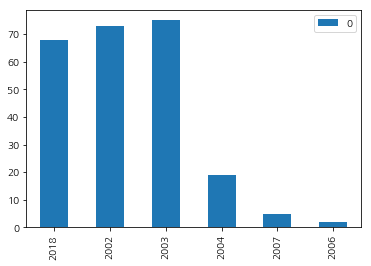

In [32]:
pd.DataFrame.from_dict(data, orient='index').plot.bar()

242 개의 citing paper 중 이들의 저널의 빈도수를 측정한다.

In [33]:
Counter([str(i).split('.')[0] for i in df.loc[df[df['year_refer'].isnull()].index.tolist()]['journal_infor'].values])

Counter({' Asia-Pacific Journal of Financial Studies ': 53,
         ' 선물연구 ': 42,
         ' 재무관리연구 ': 57,
         ' 재무연구 ': 63,
         ' 한국증권학회지 ': 27})

In [34]:
data = dict(Counter([str(i).split('.')[0] for i in df.loc[df[df['year_refer'].isnull()].index.tolist()]['journal_infor'].values]))

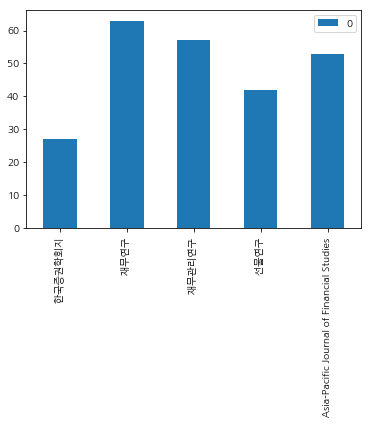

In [35]:
pd.DataFrame.from_dict(data, orient='index').plot.bar()